<a href="https://colab.research.google.com/github/CodeX-mic/mykabuang/blob/main/ActivityMic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Iris/Iris.csv")

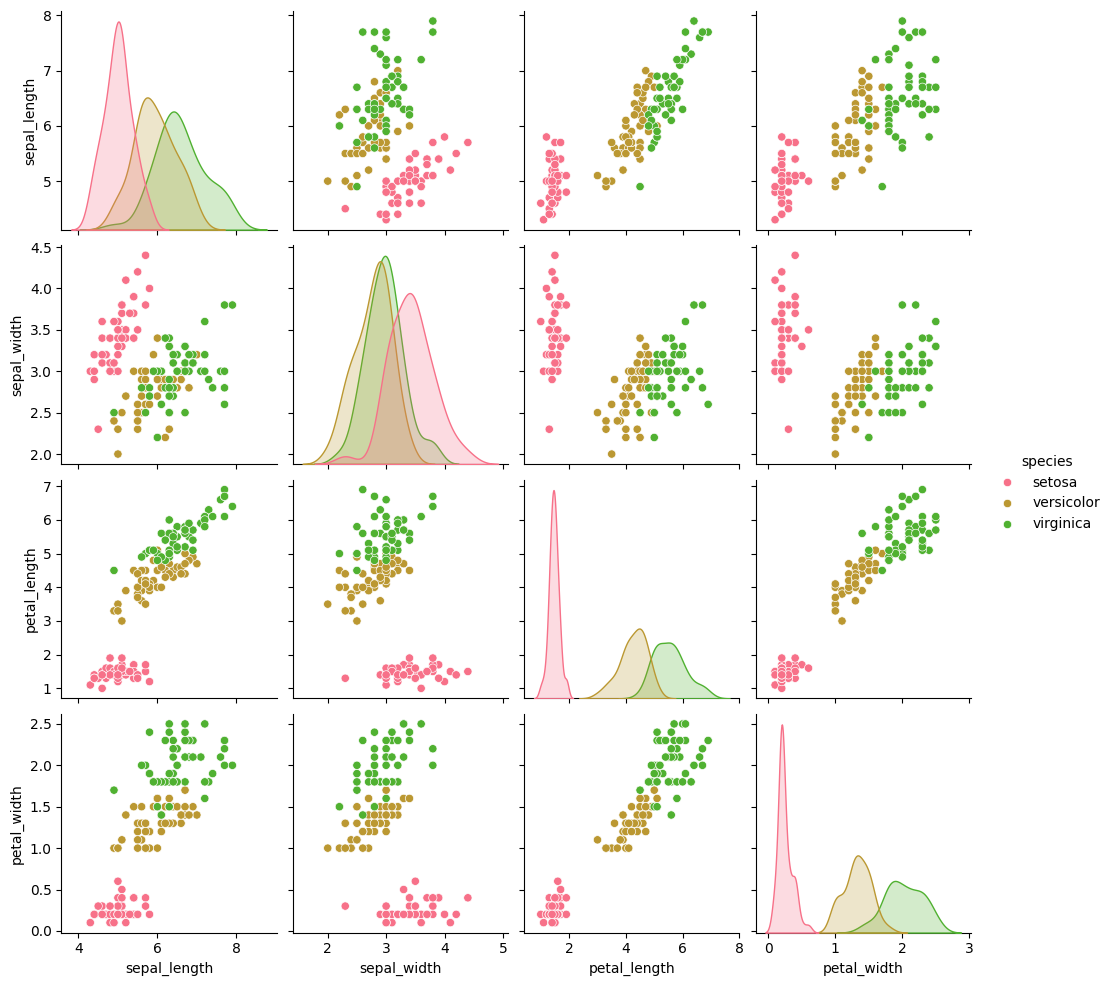

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: iris dataset
data = sns.load_dataset("iris")

sns.pairplot(data, hue="species", diag_kind="kde")
plt.show()


In [12]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
data.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


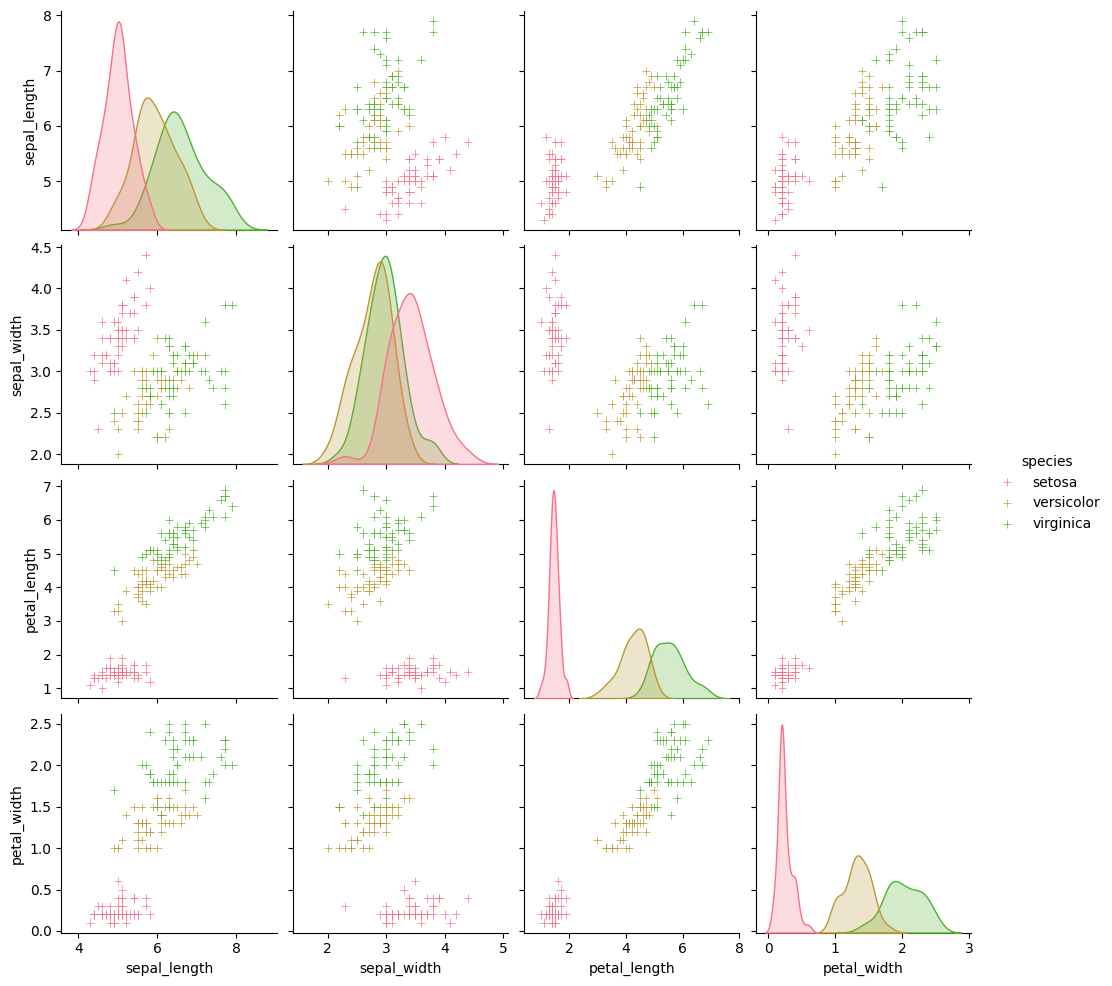

In [19]:
g = sns.pairplot(data, hue='species', markers='+')
plt.show()

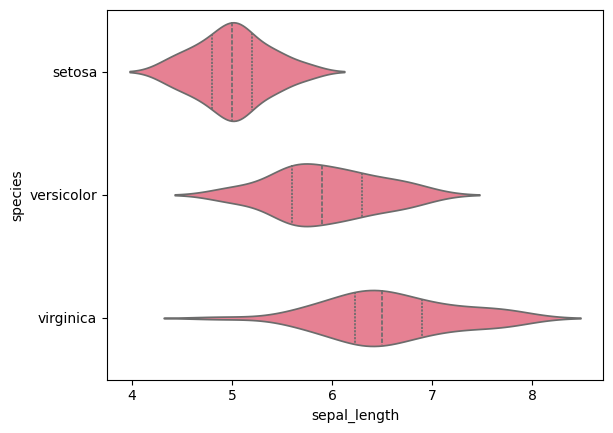

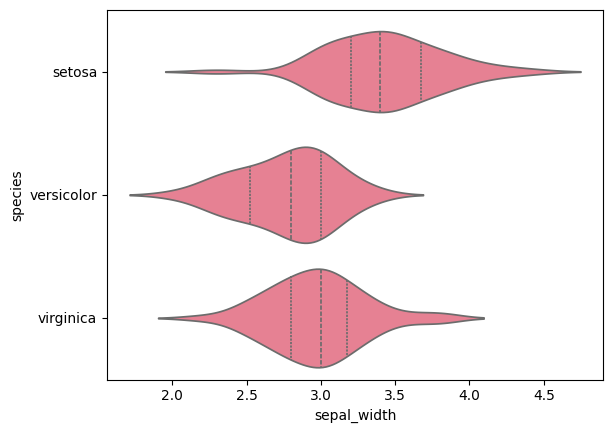

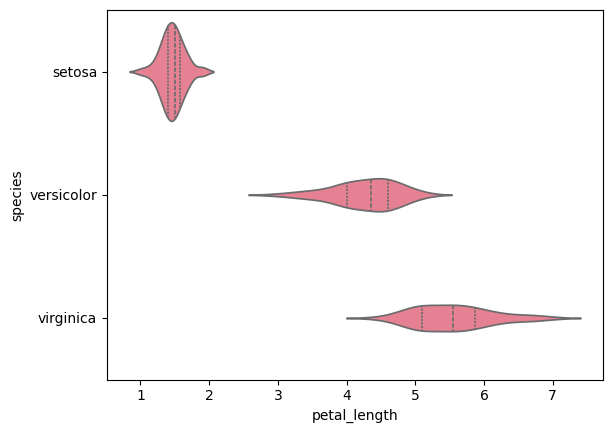

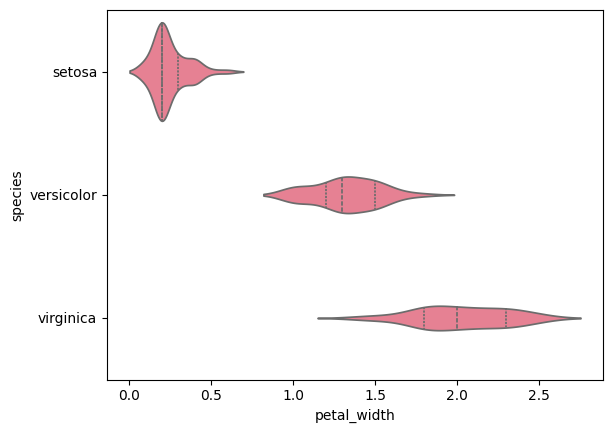

In [24]:


# Violin plots
g = sns.violinplot(y='species', x='sepal_length', data=data, inner='quartile')
plt.show()

g = sns.violinplot(y='species', x='sepal_width', data=data, inner='quartile')
plt.show()

g = sns.violinplot(y='species', x='petal_length', data=data, inner='quartile')
plt.show()

g = sns.violinplot(y='species', x='petal_width', data=data, inner='quartile')
plt.show()


In [26]:
X = data.drop(['species'], axis=1)
y = data['species']
print(X.head() , '\n')
print(X.shape  , '\n')
print(y.head() , '\n')
print(y.shape  , '\n')

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2 

(150, 4) 

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object 

(150,) 



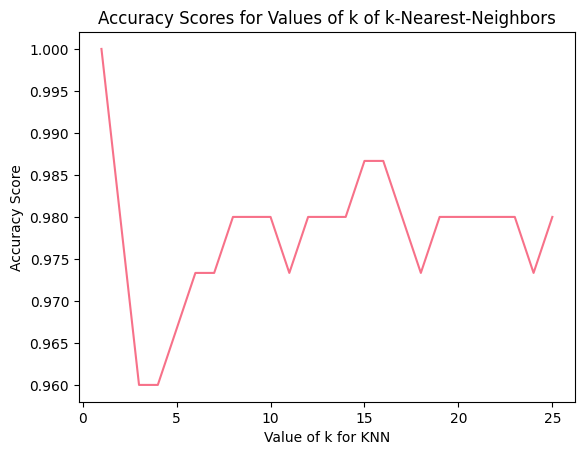

In [27]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y,y_pred))
    #if k == 3:
    #    print(knn , '\n')
    #    print(knn.fit(X,y), '\n')
    #    print(y_pred, '\n')
    #    print(scores, '\n')

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [28]:
logreg = LogisticRegression()
print(logreg, '\n')
logreg.fit(X,y)
print(logreg.fit(X,y), '\n')
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y,y_pred))

LogisticRegression() 

LogisticRegression() 

0.9733333333333334


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


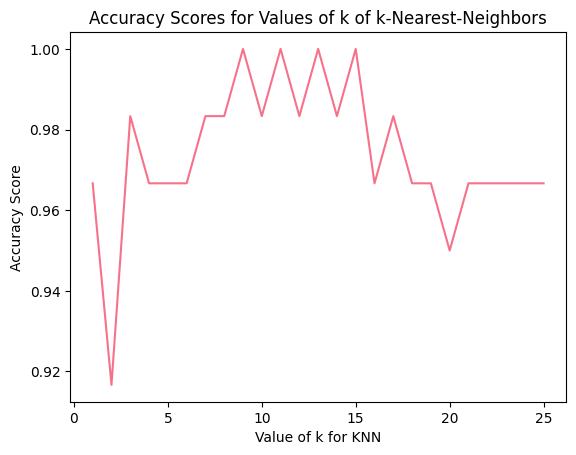

In [30]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    #if k == 3:
    #    print(knn , '\n')
    #    print(knn.fit(X_train,y_train), '\n')
    #    print(y_pred, '\n')
    #    print(scores, '\n')

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [31]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


In [32]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)


KNeighborsClassifier(n_neighbors=12)

In [33]:
knn.predict([[6, 3, 4, 2]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['versicolor'], dtype=object)

/tmp/ipython-input-4130632778.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["KNN", "Logistic Regression"], y=[acc_knn, acc_log], palette="husl")


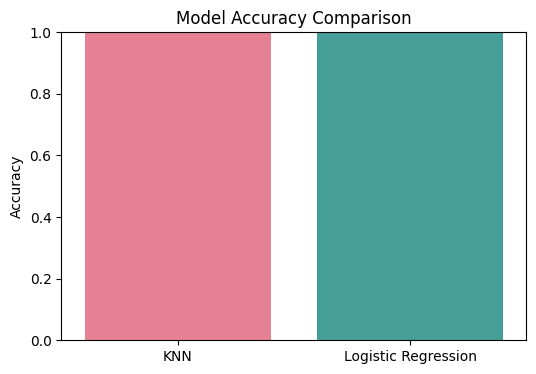

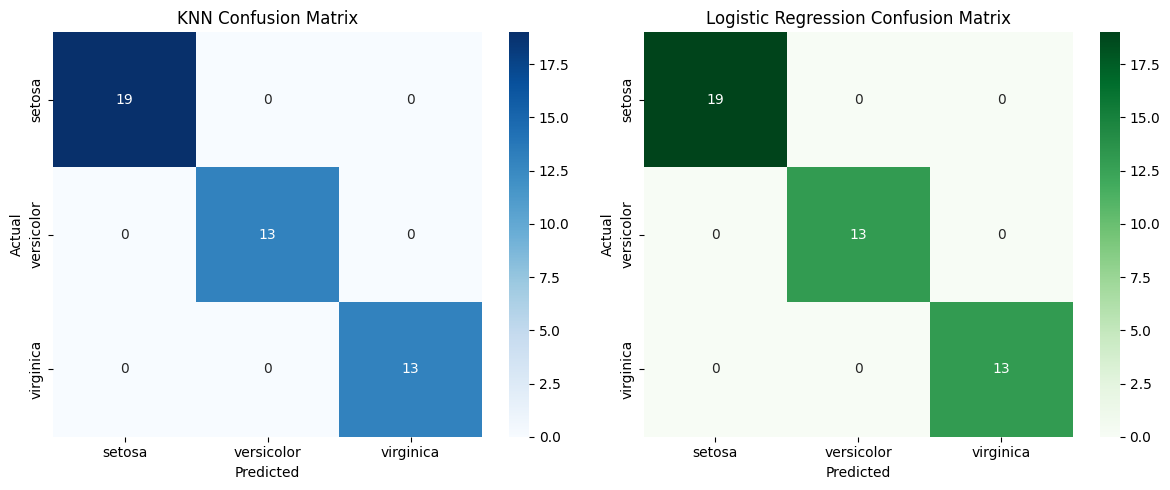


Sample Input: [[6, 3, 4, 2]]
KNN Prediction: ['versicolor']
Logistic Regression Prediction: ['versicolor']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
data = sns.load_dataset("iris")

# Features & labels
X = data.drop("species", axis=1)
y = data["species"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 1. KNN Model ---
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# --- 2. Logistic Regression ---
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# --- Accuracy comparison ---
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_log = accuracy_score(y_test, y_pred_log)

# --- Plot Accuracy Bar Chart ---
plt.figure(figsize=(6,4))
sns.barplot(x=["KNN", "Logistic Regression"], y=[acc_knn, acc_log], palette="husl")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

# --- Confusion Matrix Plot ---
fig, axes = plt.subplots(1, 2, figsize=(12,5))

cm_knn = confusion_matrix(y_test, y_pred_knn, labels=log_reg.classes_)
cm_log = confusion_matrix(y_test, y_pred_log, labels=log_reg.classes_)

sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=log_reg.classes_, yticklabels=log_reg.classes_, ax=axes[0])
axes[0].set_title("KNN Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_log, annot=True, fmt="d", cmap="Greens", xticklabels=log_reg.classes_, yticklabels=log_reg.classes_, ax=axes[1])
axes[1].set_title("Logistic Regression Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# --- Prediction comparison for a sample ---
sample = [[6, 3, 4, 2]]
print("\nSample Input:", sample)
print("KNN Prediction:", knn.predict(sample))
print("Logistic Regression Prediction:", log_reg.predict(sample))
